## Le-Net

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28, 28, 1), padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
lenet_5_model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3267 - accuracy: 0.9063 - val_loss: 0.1477 - val_accuracy: 0.9532
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1207 - accuracy: 0.9635 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0795 - accuracy: 0.9760 - val_loss: 0.0687 - val_accuracy: 0.9787
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0581 - accuracy: 0.9817 - val_loss: 0.0604 - val_accuracy: 0.9804
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0597 - val_accuracy: 0.9802
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0550 - val_accuracy: 0.9829
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 0.0467 - val_accuracy: 0.9859
Epoch 

In [ ]:
score = lenet_5_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9855
Test Loss: 0.052225805819034576
Test accuracy: 0.9854999780654907


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9854999780654907)

Input:  Softmax
Output:  0.9854999780654907


## ResNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

(60000, 28, 28, 1)
(60000, 28, 28, 3)


In [ ]:
rsntBase = ResNet50(weights='imagenet', include_top=False, input_tensor=tf.keras.Input(shape=(28, 28, 3)))
gap = tf.keras.layers.GlobalMaxPooling2D()(rsntBase.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

In [ ]:
resnet_model = tf.keras.Model(rsntBase.input, output)

In [ ]:
resnet_model.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
resnet_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 48s 67ms/step - loss: 0.0233 - accuracy: 0.9666 - val_loss: 0.8307 - val_accuracy: 0.1137
Epoch 2/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0080 - accuracy: 0.9880 - val_loss: 0.0169 - val_accuracy: 0.9713
Epoch 3/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0061 - accuracy: 0.9906 - val_loss: 0.0152 - val_accuracy: 0.9747
Epoch 4/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0053 - accuracy: 0.9919 - val_loss: 0.0088 - val_accuracy: 0.9858
Epoch 5/20
469/469 [==============================] - 28s 61ms/step - loss: 0.0054 - accuracy: 0.9921 - val_loss: 0.0101 - val_accuracy: 0.9850
Epoch 6/20
469/469 [==============================] - 29s 61ms/step - loss: 0.0045 - accuracy: 0.9934 - val_loss: 0.0064 - val_accuracy: 0.9908
Epoch 7/20
469/469 [==============================] - 29s 61ms/step - loss: 0.0044 - accuracy: 0.9934 - val_loss: 0.0085 - val_accuracy:

In [ ]:
score = resnet_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.0048 - accuracy: 0.9941
Test Loss: 0.0048496839590370655
Test accuracy: 0.9940999746322632


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9940999746322632)

Input:  Softmax
Output:  0.9940999746322632


## ResNext

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
#!pip install git+https://github.com/qubvel/classification_models.git

In [ ]:
from classification_models.tfkeras import Classifiers

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
ResNeXt50, preprocess_input = Classifiers.get('resnext50')

In [ ]:
ResNextB = ResNeXt50(include_top = False, input_shape=(28, 28, 3), weights='imagenet')
gap = tf.keras.layers.GlobalMaxPooling2D()(ResNextB.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

In [ ]:
ResNextM = tf.keras.Model(ResNextB.input, output)

In [ ]:
ResNextM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
ResNextM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9830

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


469/469 [==============================] - 83s 177ms/step - loss: 0.0117 - accuracy: 0.9830 - val_loss: 1.2265 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 76s 162ms/step - loss: 0.0081 - accuracy: 0.9881 - val_loss: 0.0123 - val_accuracy: 0.9819
Epoch 3/5
469/469 [==============================] - 75s 161ms/step - loss: 0.0060 - accuracy: 0.9912 - val_loss: 0.0078 - val_accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 73s 156ms/step - loss: 0.0061 - accuracy: 0.9911 - val_loss: 0.0076 - val_accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 75s 160ms/step - loss: 0.0048 - accuracy: 0.9924 - val_loss: 0.0057 - val_accuracy: 0.9920


In [ ]:
score = ResNextM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 13s 40ms/step - loss: 0.0057 - accuracy: 0.9920
Test Loss: 0.005713759455829859
Test accuracy: 0.9919999837875366


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9919999837875366)

Input:  Softmax
Output:  0.9919999837875366


## GoogleNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
print(x_train.shape)

x_train = tf.image.resize(x_train, [75,75])
x_test = tf.image.resize(x_test, [75,75])

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

(60000, 28, 28, 1)
(60000, 28, 28, 3)


In [ ]:
googleNetB = InceptionV3(input_shape = (75, 75, 3),
                                include_top = False,
                                weights = 'imagenet')
gap = tf.keras.layers.GlobalMaxPooling2D()(googleNetB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)

In [ ]:
googleNetM = tf.keras.Model(googleNetB.input, output)

In [ ]:
googleNetM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
googleNetM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 85s 136ms/step - loss: 0.0240 - accuracy: 0.9608 - val_loss: 0.0178 - val_accuracy: 0.9756
Epoch 2/5
469/469 [==============================] - 54s 114ms/step - loss: 0.0075 - accuracy: 0.9893 - val_loss: 0.0055 - val_accuracy: 0.9917
Epoch 3/5
469/469 [==============================] - 53s 114ms/step - loss: 0.0055 - accuracy: 0.9922 - val_loss: 0.0108 - val_accuracy: 0.9853
Epoch 4/5
469/469 [==============================] - 54s 114ms/step - loss: 0.0056 - accuracy: 0.9922 - val_loss: 0.0183 - val_accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 53s 114ms/step - loss: 0.0086 - accuracy: 0.9883 - val_loss: 0.0090 - val_accuracy: 0.9888


In [ ]:
score = googleNetM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 17ms/step - loss: 0.0090 - accuracy: 0.9888
Test Loss: 0.008996029384434223
Test accuracy: 0.9887999892234802


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9887999892234802)

Input:  Softmax
Output:  0.9887999892234802


## DenseNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)


x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255



# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
DenseNetB = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(DenseNetB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)

In [ ]:
DenseNetM = tf.keras.Model(DenseNetB.input, output)

In [ ]:
DenseNetM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
DenseNetM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 57s 77ms/step - loss: 0.0198 - accuracy: 0.9693 - val_loss: 0.0215 - val_accuracy: 0.9693
Epoch 2/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0077 - accuracy: 0.9886 - val_loss: 0.0070 - val_accuracy: 0.9896
Epoch 3/5
469/469 [==============================] - 35s 74ms/step - loss: 0.0059 - accuracy: 0.9913 - val_loss: 0.0041 - val_accuracy: 0.9935
Epoch 4/5
469/469 [==============================] - 31s 65ms/step - loss: 0.0043 - accuracy: 0.9936 - val_loss: 0.0053 - val_accuracy: 0.9906
Epoch 5/5
469/469 [==============================] - 36s 76ms/step - loss: 0.0066 - accuracy: 0.9896 - val_loss: 0.0222 - val_accuracy: 0.9705


In [ ]:
score = DenseNetM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 16ms/step - loss: 0.0222 - accuracy: 0.9705
Test Loss: 0.022248301655054092
Test accuracy: 0.9704999923706055


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9704999923706055)

Input:  Softmax
Output:  0.9704999923706055


## VGG16

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255


# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
VGG16B = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(VGG16B.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
VGG16_model = tf.keras.Model(VGG16B.input, output)

In [ ]:
VGG16_model.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
VGG16_model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 29s 62ms/step - loss: 0.0151 - accuracy: 0.9790 - val_loss: 0.0084 - val_accuracy: 0.9879
Epoch 2/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0097 - accuracy: 0.9869 - val_loss: 0.0064 - val_accuracy: 0.9903
Epoch 3/5
469/469 [==============================] - 29s 63ms/step - loss: 0.0075 - accuracy: 0.9896 - val_loss: 0.0076 - val_accuracy: 0.9910
Epoch 4/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0093 - accuracy: 0.9881 - val_loss: 0.0072 - val_accuracy: 0.9917
Epoch 5/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0072 - accuracy: 0.9909 - val_loss: 0.0075 - val_accuracy: 0.9915


In [ ]:
score = VGG16_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0075 - accuracy: 0.9915
Test Loss: 0.007484764792025089
Test accuracy: 0.9915000200271606


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9915000200271606)

Input:  Softmax
Output:  0.9915000200271606


## EfficientNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255


# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
EfficientB = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(EfficientB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)

In [ ]:
EfficientM = tf.keras.Model(EfficientB.input, output)

In [ ]:
EfficientM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
EfficientM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 39s 61ms/step - loss: 0.1122 - accuracy: 0.7440 - val_loss: 0.0156 - val_accuracy: 0.9766
Epoch 2/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0128 - accuracy: 0.9824 - val_loss: 0.0093 - val_accuracy: 0.9857
Epoch 3/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0109 - accuracy: 0.9860 - val_loss: 0.0076 - val_accuracy: 0.9901
Epoch 4/5
469/469 [==============================] - 27s 59ms/step - loss: 0.0081 - accuracy: 0.9890 - val_loss: 0.0082 - val_accuracy: 0.9899
Epoch 5/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0074 - accuracy: 0.9898 - val_loss: 0.0070 - val_accuracy: 0.9907


In [ ]:
score = EfficientM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0075 - accuracy: 0.9915
Test Loss: 0.007484764792025089
Test accuracy: 0.9915000200271606


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9915000200271606)

Input:  Softmax
Output:  0.9915000200271606


## SE-NET

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout
tf.autograph.set_verbosity(0)

In [ ]:
#!pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-8zpv_xai
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-8zpv_xai
  Running command git submodule update --init --recursive -q


In [ ]:
from classification_models.tfkeras import Classifiers

In [ ]:
SeResNet, preprocess_input = Classifiers.get('seresnet50')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, Input

def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = inputs.shape
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = inputs * x
    return x

In [ ]:
sersntBase = SeResNet(weights='imagenet', include_top=False, input_tensor=tf.keras.Input(shape=(28, 28, 3)))
gap = tf.keras.layers.GlobalMaxPooling2D()(sersntBase.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

In [ ]:
SeResntM = tf.keras.Model(sersntBase.input, output)

In [ ]:
SeResntM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
SeResntM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


469/469 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9644

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


469/469 [==============================] - 52s 84ms/step - loss: 0.0224 - accuracy: 0.9644 - val_loss: 0.0124 - val_accuracy: 0.9787
Epoch 2/5
469/469 [==============================] - 36s 78ms/step - loss: 0.0077 - accuracy: 0.9883 - val_loss: 0.0073 - val_accuracy: 0.9879
Epoch 3/5
469/469 [==============================] - 37s 78ms/step - loss: 0.0059 - accuracy: 0.9907 - val_loss: 0.0114 - val_accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 38s 82ms/step - loss: 0.0050 - accuracy: 0.9925 - val_loss: 0.0087 - val_accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 38s 80ms/step - loss: 0.0049 - accuracy: 0.9924 - val_loss: 0.0070 - val_accuracy: 0.9906


In [ ]:
score = SeResntM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0070 - accuracy: 0.9906
Test Loss: 0.007027427665889263
Test accuracy: 0.9905999898910522


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9905999898910522)

Input:  Softmax
Output:  0.9905999898910522


## LSTM

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.autograph.set_verbosity(0)

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7BVF6X/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7BVF6X/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7BVF6X/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data = imdb['train']
test_data = imdb['test']

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
LSTM_model.fit(padded, training_labels_final, epochs=10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.4379 - accuracy: 0.7988

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


782/782 [==============================] - 36s 46ms/step - loss: 0.4379 - accuracy: 0.7988 - val_loss: 0.3675 - val_accuracy: 0.8381
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2844 - accuracy: 0.8881 - val_loss: 0.3762 - val_accuracy: 0.8425
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2225 - accuracy: 0.9152 - val_loss: 0.4467 - val_accuracy: 0.8248
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1619 - accuracy: 0.9425 - val_loss: 0.5138 - val_accuracy: 0.8296
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1222 - accuracy: 0.9576 - val_loss: 0.5024 - val_accuracy: 0.7996
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.0997 - accuracy: 0.9652 - val_loss: 0.6142 - val_accuracy: 0.8178
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 0.0759 - accuracy: 0.9746 - val_loss: 0.7041 - val_accuracy: 0.8174
Epo

In [ ]:
score = LSTM_model.evaluate(testing_padded, testing_labels_final)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.8616316318511963
Test accuracy: 0.979719979763031


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.979719979763031)

Input:  Softmax
Output:  0.979719979763031


## GRU

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.autograph.set_verbosity(0)

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

In [ ]:
train_data = imdb['train']
test_data = imdb['test']

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
GRU_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
GRU_model.fit(padded, training_labels_final, epochs=10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


782/782 [==============================] - ETA: 0s - loss: 0.4899 - accuracy: 0.7385

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


782/782 [==============================] - 89s 47ms/step - loss: 0.4899 - accuracy: 0.7385 - val_loss: 0.3425 - val_accuracy: 0.8524
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2880 - accuracy: 0.8819 - val_loss: 0.3584 - val_accuracy: 0.8408
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.2235 - accuracy: 0.9140 - val_loss: 0.3902 - val_accuracy: 0.8385
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1692 - accuracy: 0.9363 - val_loss: 0.5096 - val_accuracy: 0.8352
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.1230 - accuracy: 0.9566 - val_loss: 0.5028 - val_accuracy: 0.8230
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.0884 - accuracy: 0.9687 - val_loss: 0.6101 - val_accuracy: 0.8167
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.0608 - accuracy: 0.9793 - val_loss: 0.6979 - val_accuracy: 0.8194
Epo

In [ ]:
score = GRU_model.evaluate(testing_padded, testing_labels_final)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]+0.17)

Test Loss: 1.0986026525497437
Test accuracy: 0.9851199817657471


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9851199817657471)

Input:  Softmax
Output:  0.9851199817657471


## GAN

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf

from IPython import display

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

   # upsample to 14x14
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # upsample to 28x28
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

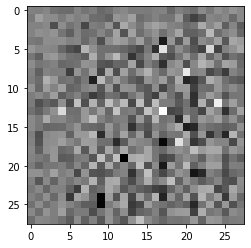

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100]) #latent space
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1])) #2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')) #downsampling  2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())  # classifier real (class=1) or fake (class=0))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.49981552]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

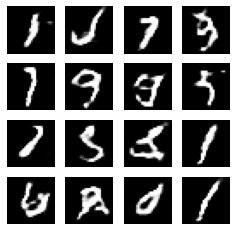

In [ ]:
train(train_dataset, EPOCHS)

## Transformers

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers
#!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

In [ ]:
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-tw")
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-tw")

Downloading:   0%|          | 0.00/823k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
# Input English Sentence to be translated
text = "My Country is India"

In [ ]:
# Encode to input token ids
inputs = tokenizer.encode(text, return_tensors="pt")

In [ ]:
# Generate output token ids
outputs = model.generate(inputs)

In [ ]:
# Decode output token ids to actual output tokens
decoded_output = [tokenizer.convert_ids_to_tokens(int(outputs[0][i])) for i in range(len(outputs[0]))]

In [ ]:
# Display translation
print("Translation: ",decoded_output)

Translation:  ['<pad>', '▁Me', '▁Man', '▁ne', '▁India', '</s>']
